Apply PCA to reduce dimensionality in modeling net migration into US counties.

Data come from [US Census](https://bit.ly/38PyfmR)

In [1]:
%run ./mobilityHelpers.ipynb

helpers = mobilityHelpers()

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
popDF = pd.read_csv(populationFile, encoding = "ISO-8859-1")
popDF.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [3]:
"""Identify columns to apply PCA to"""

cols = list(popDF.columns)
myCols = ["STNAME", "CTYNAME"]
myCols.extend([cc for cc in cols if "20" in cc])
myDF = popDF.copy()
myCols
cols = [cc for cc in myCols if "20" in cc]
cols = [cc for cc in cols if "NETMIG" not in cc]
print(f"""We have {len(cols)} population-dynamics variables """
      f"""to use for modeling net migration into a county for each of the 10 years""")

n_comp_to_start_with = int(1.0/3 * len(cols))
print(f"""We are going to reduce it by identifying the """
      f"""primary components.  We will start with {n_comp_to_start_with}""")

We have 138 population-dynamics variables to use for modeling net migration into a county for each of the 10 years
We are going to reduce it by identifying the primary components.  We will start with 46


2010
We are going to reduce it by identifying the primary components for columns corresponding to 2010.  
          That makes 12
Applying RF regression for 12 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.095
pc_1:  0.390
pc_2:  0.262
pc_3:  0.029
pc_4:  0.053
pc_5:  0.027
pc_6:  0.067
pc_7:  0.072
pc_8:  0.006
pc_9:  0.000
pc_10:  0.000
pc_11:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.095
pc_1:   0.390
pc_2:   0.262
pc_4:   0.053
pc_6:   0.067
pc_7:   0.072
RFR R^2 with identified features:  0.939
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2010   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.291e

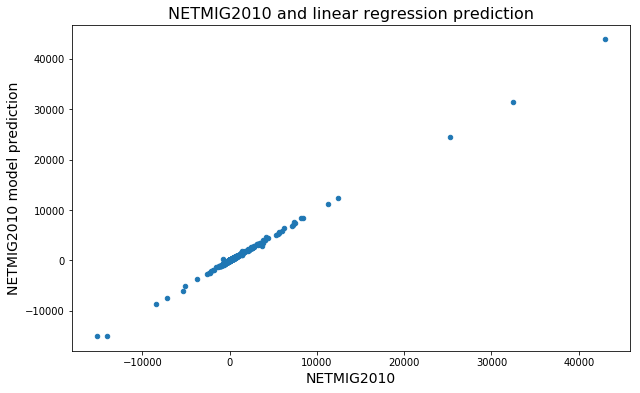

2011
We are going to reduce it by identifying the primary components for columns corresponding to 2011.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.141
pc_1:  0.031
pc_2:  0.393
pc_3:  0.037
pc_4:  0.006
pc_5:  0.141
pc_6:  0.016
pc_7:  0.069
pc_8:  0.021
pc_9:  0.078
pc_10:  0.068
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.141
pc_2:   0.393
pc_5:   0.141
pc_7:   0.069
pc_9:   0.078
pc_10:   0.068
RFR R^2 with identified features:  0.889
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2011   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-stat

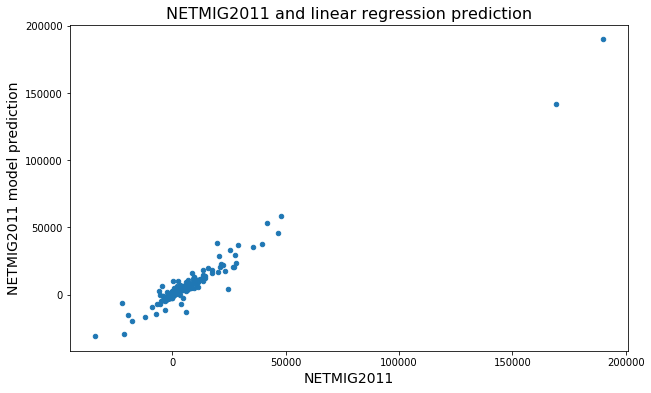

2012
We are going to reduce it by identifying the primary components for columns corresponding to 2012.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.116
pc_1:  0.009
pc_2:  0.594
pc_3:  0.017
pc_4:  0.014
pc_5:  0.015
pc_6:  0.024
pc_7:  0.025
pc_8:  0.018
pc_9:  0.137
pc_10:  0.031
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.116
pc_2:   0.594
pc_9:   0.137
RFR R^2 with identified features:  0.847
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2012   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.128e+04
Date:     

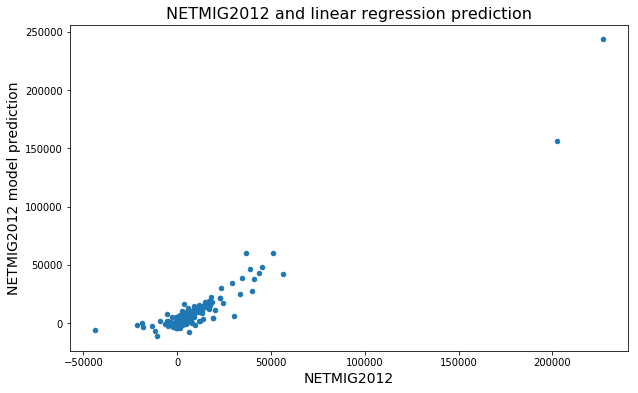

2013
We are going to reduce it by identifying the primary components for columns corresponding to 2013.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.114
pc_1:  0.015
pc_2:  0.558
pc_3:  0.020
pc_4:  0.013
pc_5:  0.016
pc_6:  0.030
pc_7:  0.036
pc_8:  0.022
pc_9:  0.134
pc_10:  0.041
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.114
pc_2:   0.558
pc_9:   0.134
RFR R^2 with identified features:  0.807
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2013   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     7952.
Date:     

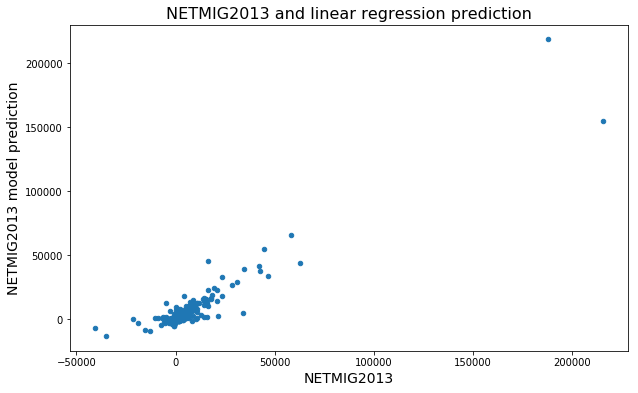

2014
We are going to reduce it by identifying the primary components for columns corresponding to 2014.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.132
pc_1:  0.017
pc_2:  0.379
pc_3:  0.064
pc_4:  0.018
pc_5:  0.016
pc_6:  0.024
pc_7:  0.027
pc_8:  0.103
pc_9:  0.144
pc_10:  0.076
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.132
pc_2:   0.379
pc_3:   0.064
pc_8:   0.103
pc_9:   0.144
pc_10:   0.076
RFR R^2 with identified features:  0.898
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2014   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-stat

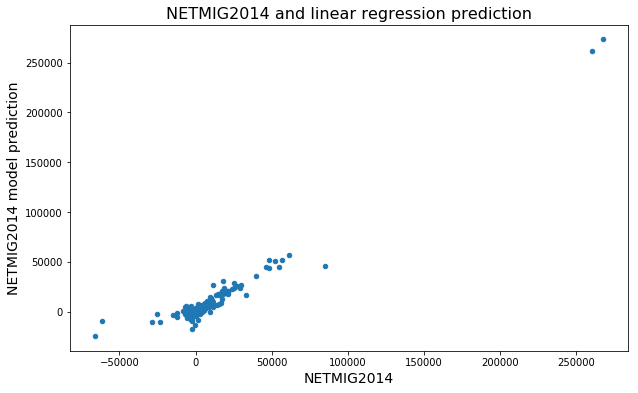

2015
We are going to reduce it by identifying the primary components for columns corresponding to 2015.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.153
pc_1:  0.021
pc_2:  0.402
pc_3:  0.056
pc_4:  0.011
pc_5:  0.017
pc_6:  0.014
pc_7:  0.035
pc_8:  0.117
pc_9:  0.123
pc_10:  0.050
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.153
pc_2:   0.402
pc_3:   0.056
pc_8:   0.117
pc_9:   0.123
pc_10:   0.050
RFR R^2 with identified features:  0.903
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2015   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-stat

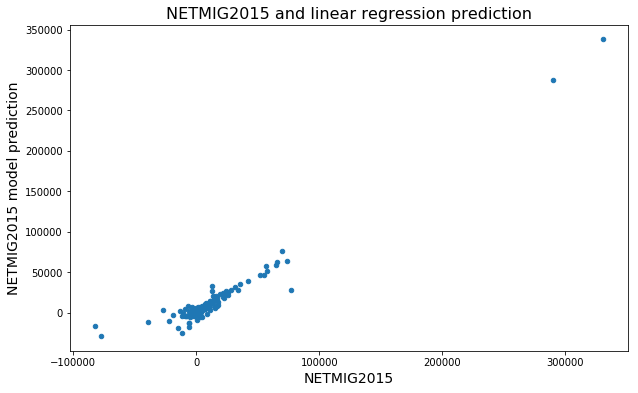

2016
We are going to reduce it by identifying the primary components for columns corresponding to 2016.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.097
pc_1:  0.020
pc_2:  0.437
pc_3:  0.085
pc_4:  0.016
pc_5:  0.014
pc_6:  0.023
pc_7:  0.034
pc_8:  0.082
pc_9:  0.143
pc_10:  0.050
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.097
pc_2:   0.437
pc_3:   0.085
pc_8:   0.082
pc_9:   0.143
pc_10:   0.050
RFR R^2 with identified features:  0.894
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2016   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-stat

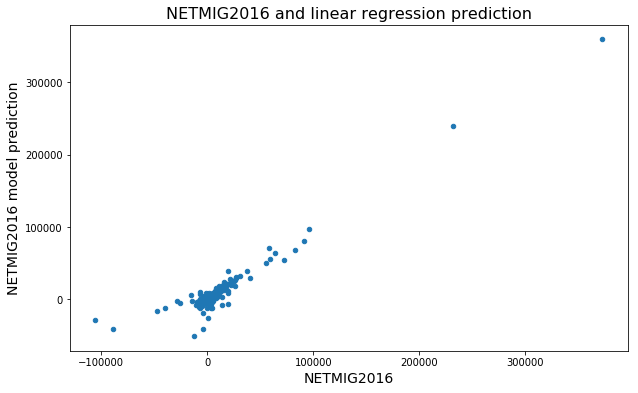

2017
We are going to reduce it by identifying the primary components for columns corresponding to 2017.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.128
pc_1:  0.012
pc_2:  0.440
pc_3:  0.074
pc_4:  0.015
pc_5:  0.015
pc_6:  0.024
pc_7:  0.026
pc_8:  0.058
pc_9:  0.160
pc_10:  0.048
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.128
pc_2:   0.440
pc_3:   0.074
pc_8:   0.058
pc_9:   0.160
RFR R^2 with identified features:  0.860
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2017   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:         

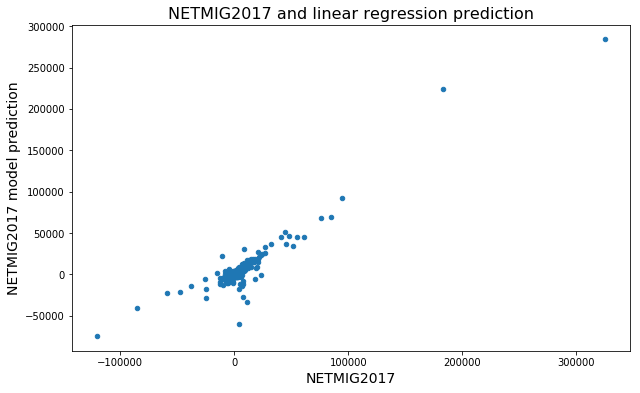

2018
We are going to reduce it by identifying the primary components for columns corresponding to 2018.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.139
pc_1:  0.106
pc_2:  0.356
pc_3:  0.032
pc_4:  0.021
pc_5:  0.014
pc_6:  0.051
pc_7:  0.032
pc_8:  0.036
pc_9:  0.146
pc_10:  0.067
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.139
pc_1:   0.106
pc_2:   0.356
pc_6:   0.051
pc_9:   0.146
pc_10:   0.067
RFR R^2 with identified features:  0.865
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2018   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-stat

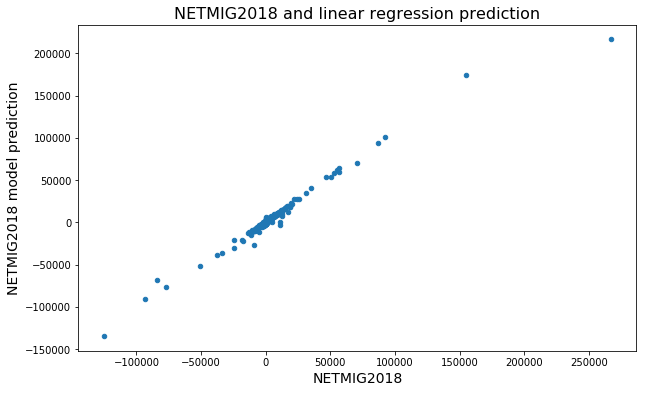

2019
We are going to reduce it by identifying the primary components for columns corresponding to 2019.  
          That makes 14
Applying RF regression for 14 principal componentsto identify important ones.  Using CTV cutoff = 0.05
Feature Importances (contributions to variance):
pc_0:  0.148
pc_1:  0.115
pc_2:  0.365
pc_3:  0.028
pc_4:  0.016
pc_5:  0.064
pc_6:  0.014
pc_7:  0.036
pc_8:  0.042
pc_9:  0.099
pc_10:  0.075
pc_11:  0.000
pc_12:  0.000
pc_13:  0.000
Identified important features (CTV cutoff = 0.05)
pc_0:   0.148
pc_1:   0.115
pc_2:   0.365
pc_5:   0.064
pc_9:   0.099
pc_10:   0.075
RFR R^2 with identified features:  0.865
Applying linear regression using only the important principal components
                            OLS Regression Results                            
Dep. Variable:             NETMIG2019   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-stat

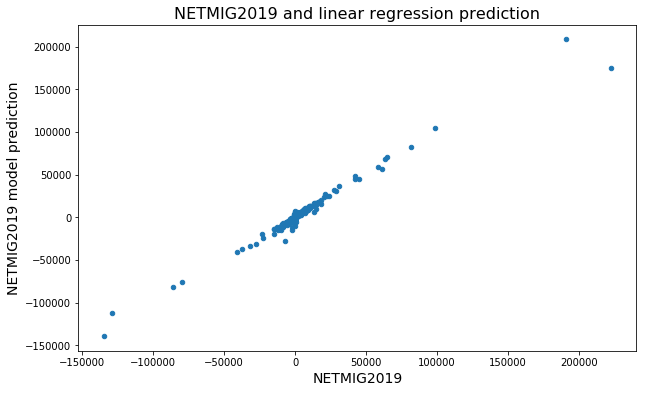

In [4]:
for year in range (2010, 2020):
    yrCols = [cc for cc in cols if str(year) in cc]
    yrCols

    print(year)
    n_comp_to_start_with = len(yrCols)
    print(f"""We are going to reduce it by identifying the """
          f"""primary components for columns corresponding to {year}.  
          That makes {n_comp_to_start_with}""")

    """Applying PCA for the year"""

    %run ./mobilityHelpers.ipynb
    helpers = mobilityHelpers(ctv_cutoff = 0.05)

    """Applying PCA for the year"""
    pcPopDF, eigenvalues = helpers.applyPCA(myDF, yrCols, n_comp_to_start_with, 
                                            identify_outliers=False,
                                            beta_outliers=-3.0,
                                            tolerance=-1.0,
                                            remove_most_frequent=False,
                                            verbose=False
                                           )
    """
    Get contribution to variance (CTV) by applying Random-Forest Regression.  Use 0.055 for cutoff
    """
    print(f"""Applying RF regression for {len(eigenvalues)} principal components"""
          f"""to identify important ones.  Using CTV cutoff = {helpers.mCTVcutoff}""")
    myXs4Regression = helpers.fitRFR(pcPopDF,
                                     yVarBase="NETMIG",
                                     xVars=["pc_" + str(ii) for ii in range(len(eigenvalues))],
                                     year=2010,
                                     ctv_cutoff=helpers.mCTVcutoff,
                                     n_rfr_trees=100,
                                     verbose=True,
                                    )

    #     myXs4Regression

    %run ./mobilityHelpers.ipynb
    helpers = mobilityHelpers()
    
    print(f"""Applying linear regression using only the important principal components""")
    pPopDFreg = helpers.applyLinearRegression(pcPopDF,
                                              importantXs=myXs4Regression,
                                              yVarBase="NETMIG",
                                              year=year,
                                              verbose=True,
                                              showplots=True,
                                             )

   
    

In [5]:
csvOut = populationFile.replace(".csv", "_modeled_analyzed.csv")
pcPopDF.to_csv(csvOut, index=False)
print(f"""Saved the data into {csvOut}""")

Saved the data into ./../../ResearchProposal/population_dynamics/census_population_data_2010_2019_modeled_analyzed.csv


TODO:

1. Set up tracking of PCs for each year
2. Add economic data (GDP, income, and mean-median income ratios) and repeat the PCA -> regression.
3. DONE: Compare results of linear and RF regression
4. DONE: Group by years: a separate set of PCAs for 2010, 2011, ..., 2019.
5. Add expression of the features from PCs.